In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


data = pd.read_csv('winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


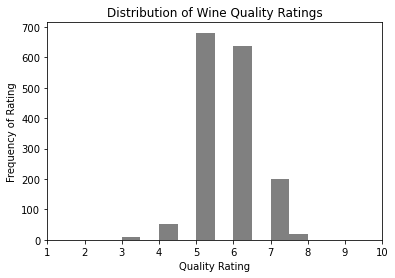

In [66]:
# create histogram of wine quality ratings

ax = data.hist(column='quality', bins=10, grid=False, color='grey')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency of Rating')
plt.xlim([1,10])
plt.show()

In [67]:
X = data.drop('quality', axis=1)
y = data['quality']

data.fillna(0, inplace=True) #checking for nulls

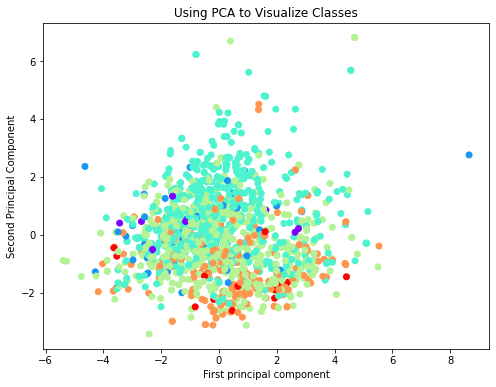

In [68]:
# PCA
X_pca = X.copy()
y_pca = y.copy()
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

plt.figure(figsize=( 8,6))
plt.scatter(X_pca[:, 0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component' )
plt.ylabel('Second Principal Component' )
plt.title("Using PCA to Visualize Classes" )
plt.show()

In [69]:
print("PCA Components:\n ", pca.components_)
print("PCA Explained Variance Ratio:\n ", pca.explained_variance_ratio_)
print("PCA Explained Variance:\n ", pca.explained_variance_)

PCA Components:
  [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]]
PCA Explained Variance Ratio:
  [0.28173931 0.1750827 ]
PCA Explained Variance:
  [3.10107182 1.92711489]


In [70]:
#NO PARAM GRID EXAMPLE (LESS OPTIMAL)
param_grid = {   
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=====================RANDOM FOREST CLASSIFIER (NO OPTIMIZATION)=====================\n")
print("Accuracy: ", accuracy)
print('\nClassification Report: \n', report)

=====================RANDOM FOREST CLASSIFIER (NO OPTIMIZATION)=====================

Accuracy:  0.7125

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.78      0.80      0.79       203
           6       0.66      0.76      0.71       197
           7       0.65      0.50      0.57        60
           8       0.00      0.00      0.00        10

    accuracy                           0.71       480
   macro avg       0.35      0.34      0.34       480
weighted avg       0.68      0.71      0.70       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']

bestFeaturesFit = SelectKBest(score_func=chi2, k=8).fit(X_f,y_f)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)
dfcolumns = pd.DataFrame(X_f.columns) 

category_values = pd.concat([dfcolumns,dfscores],axis=1)
category_values.columns = ['Feature','Score']
print(category_values.nlargest(dfscores.size,'Score'))

                 Feature        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655
7                density     0.000230


In [72]:
data = data.drop('density', axis=1)
data = data.drop('pH', axis=1)
data = data.drop('chlorides', axis=1)

X = data.loc[:, 'fixed acidity':'alcohol']
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=450)

In [73]:
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Random Forest Parameters: ", best_rf)

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=====================RANDOM FOREST CLASSIFIER (PARAMETER OPTIMIZATION)=====================\n")
print("Accuracy: ", accuracy)
print('\nClassification Report: \n', report)

Best Random Forest Parameters:  RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=75)
=====================RANDOM FOREST CLASSIFIER (PARAMETER OPTIMIZATION)=====================

Accuracy:  0.71875

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.78      0.85      0.82       136
           6       0.67      0.75      0.71       129
           7       0.61      0.42      0.50        40
           8       0.00      0.00      0.00         1

    accuracy                           0.72       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.68      0.72      0.70       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [ ]:
#Getting the top features from the dataset
top_features = SelectKBest(score_func=chi2, k=11)

dfscores = pd.DataFrame(top_features.fit(X,y).scores_)  #Store predictor scores in a column
dfcolumns = pd.DataFrame(X.columns)  #Store predictor variable names in a column

#List of features with heaviest weight/importance
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(11,'Score'))       #print top (by score) 10 features

#Drop the bottom two features (smallest score)
data = data.drop('density', axis=1)
data = data.drop('pH', axis=1)

X= data.loc[:, 'fixed acidity':'alcohol']
y= data['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=417)

wine_dataset_file = "winequality-red.csv"

full_df = pd.read_csv(wine_dataset_file, header = 0, delimiter=";")

In [ ]:
# Define the parameter grid for the ANN
param_grid = {
    'ann__hidden_layer_sizes': [(20,), (40,), (50,), (70,), (100,), (500,), (50, 50), (100, 100)],
    'ann__activation': ['tanh', 'relu', 'logistic'],
    'ann__solver': ['sgd', 'adam'],
    'ann__alpha': [0.0001, 0.001, 0.01],
    'ann__learning_rate': ['constant', 'adaptive'],
    'ann__learning_rate_init' : [0.01, 0.1, 0.2, 0.5, 1]
}

pipe = Pipeline([("norm", StandardScaler()),
                 ("ann", MLPClassifier(max_iter=1000, random_state=42))])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
# Predict the test set
y_pred = pipe.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=====================ANN CLASSIFIER=====================\n")

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report: \n", report)





# ### HOW WE DID INITIAL TESTSING (AND GOT THE BEST OUTCOME)
# from sklearn.metrics import f1_score

# wine_dataset_file = "winequality-red.csv"
#
# full_df = pd.read_csv(wine_dataset_file, header = 0, delimiter=";")
#
# X = full_df.iloc[:, :-1]
# Y = full_df.iloc[:, -1]
#
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=417)
#
# train_score = []
# test_score = []
# f1s = []
#
# # more layers does not improve test data
# layers = list(range(10,50,5))
# for i in layers:
#     # scaling / normalizing data helps increase test
#     pipe = make_pipeline(StandardScaler(), MLPClassifier(activation = 'logistic',
#                                                          solver = 'sgd',
#                                                          hidden_layer_sizes = (i,), #tired multiple layers as well, cannot break ~ 0.60 for test
#                                                          alpha=1e-2,
#                                                          max_iter = 1000,
#                                                          learning_rate_init = 0.2))
#
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     train_score.append(pipe.score(X_train,y_train))
#     test_score.append(pipe.score(X_test,y_test))
#     f1s.append(f1_score(y_test, y_pred, average="micro"))
#
# plt.plot(layers,train_score,'.',label = 'train set')
# plt.plot(layers,test_score,'-',label = 'test set')
# plt.xlabel('layers')
# plt.ylabel('score')
# plt.legend()
#
# optimal_index = test_score.index(max(test_score))
# print(f'Best number of hidden nodes: {layers[optimal_index]}, with a test accuracy of {test_score[optimal_index]}, and a f1 score of {f1s[optimal_index]}')
#
# non_norm = MLPClassifier(activation = 'logistic',
#                          solver = 'sgd',
#                          hidden_layer_sizes = (layers[optimal_index]), #tired multiple layers as well, cannot break ~ 0.60 for test
#                          alpha=1e-2,
#                          max_iter = 1000,
#                          learning_rate_init = 0.2)
#
# non_norm.fit(X_train, y_train)
# y_pred = non_norm.predict(X_test)
# print(f'Non normalized test accuracy of {f1_score(y_test, y_pred, average="micro")}')